# 🎬 Amazon Prime Content Analysis

In this project, a data analysis of the movie and series content on Amazon Prime Video was performed. In the analysis process, data cleaning, preprocessing and various visualization techniques were used to examine the distribution of content on the platform by years, age restrictions and directors.

## 🔍 Project Purpose

We aim to visualize and interpret the content offered on Amazon Prime:

- Production density over time,
- Age restriction distribution according to target audience,
- Periodic changes in movie and series genres,
- Most productive directors.

**This study was carried out to improve my data analysis skills, increase my application practice in Python and related libraries, and turn the results into a shareable project.**

## 📦 Tools Used

- Python (Pandas, NumPy)
- Visualization (Matplotlib, Seaborn)
- Jupyter Notebook

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [2]:
# import and examine the dataset 
df = pd.read_csv('amazon_prime_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [3]:
print(df.info())
print("\n- null value count -\n",df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB
None

- null value count -
 show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in     

- country,date_added,director columns has a lots of null values. And also rating and cast columns has few amount null values. 

## Data Cleaning 
- *drop country and date_added columns due to big amount of null values. And description and show_id unnecessary for this analysis.*
- *inserting 'unknown' value for null values in rating,cast and director columns.* 

In [6]:
dropped_cols = ['country', 'date_added', 'description', 'show_id']
df = df.drop(columns = dropped_cols)
df['rating'].fillna('unknown', inplace = True) 
df['director'].fillna('unknown', inplace = True)
df['cast'].fillna('unknown', inplace = True)
print(df.isnull().sum())
df.head()


type            0
title           0
director        0
cast            0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


,type,title,director,cast,release_year,rating,duration,listed_in
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",2014,unknown,113 min,"Comedy, Drama"
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",2018,13+,110 min,"Drama, International"
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",2017,unknown,74 min,"Action, Drama, Suspense"
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",2014,unknown,69 min,Documentary
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",1989,unknown,45 min,"Drama, Fantasy"


In [7]:
df['rating'].unique()

array(['unknown', '13+', 'ALL', '18+', 'R', 'TV-Y', 'TV-Y7', 'NR', '16+',
       'TV-PG', '7+', 'TV-14', 'TV-NR', 'TV-G', 'PG-13', 'TV-MA', 'G',
       'PG', 'NC-17', 'UNRATED', '16', 'AGES_16_', 'AGES_18_', 'ALL_AGES',
       'NOT_RATE'], dtype=object)

## EDA - EXPLORATORY DATA ANALYSİS 

1. Rating distribution
2. Content Distribution by Year (release_year)
5. Most Productive Directors (director)


#### 1. Rating distribution
- *Which age groups have more content on Amazon Prime?*

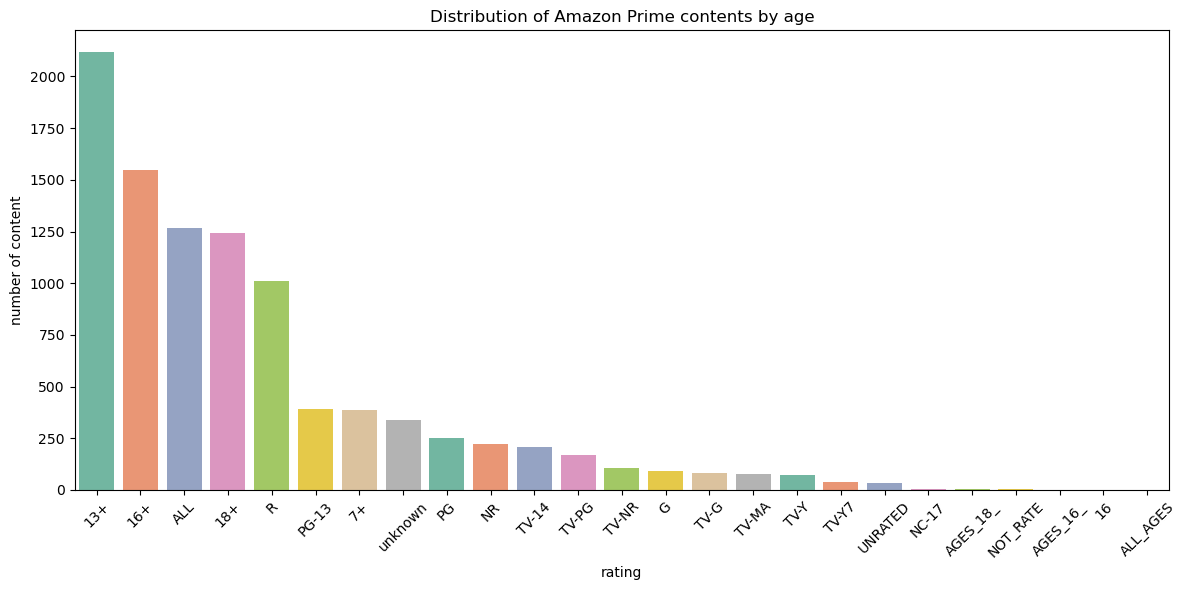

In [10]:
plt.figure(figsize = (12,6))

# draw countplot 
sns.countplot(data = df, x = 'rating', order = df['rating'].value_counts().index, palette = 'Set2')
# Title and Tags 
plt.title('Distribution of Amazon Prime contents by age')
plt.xlabel('rating')
plt.ylabel('number of content') 
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()



- The number of shows with age ratings of 13+, 16+, and 'ALL' indicates that the platform appeals to a general audience.
- The total number of 18+ and R-labeled content is quite high. This shows that Amazon Prime also offers content for adult audiences
- There are also American TV ratings, such as TV-MA, TV-Y, TV-14, PG, and PG-13. However, we will not examine them separately as they do not distort our overall conclusions.
- The "Unknown" rate is not high, but it should not be ignored.


### Content distribution by year
*With this analysis, we see how Amazon Prime content has increased over time.
We will specify certain year ranges and add the information about which year range each content falls into to our data frame.*


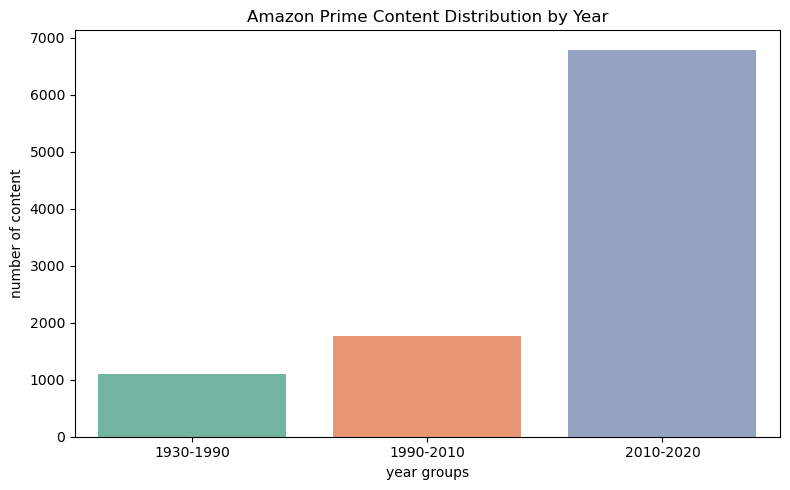

In [13]:
# dividing the years into 3 categories
df['year_group'] = pd.cut(df['release_year'], bins = [1929, 1989, 2009, 2021], labels = ['1930-1990', '1990-2010', '2010-2020'])
# number of content by years 
group_counts = df['year_group'].value_counts().sort_index() 


plt.figure(figsize=(8,5))
sns.barplot(x=group_counts.index, y=group_counts.values, palette='Set2')

plt.title('Amazon Prime Content Distribution by Year')
plt.xlabel('year groups')
plt.ylabel('number of content')
plt.tight_layout()
plt.show()



- As can be seen from this graph, while there was more content produced on the Amazon Prime platform between 2010 and 2021,  **This shows that the Amazon Prime platform is more focused on newer content.**
- Since there is a considerable amount of content produced between 1930 and 1990, it can be said that the **Amazon Prime platform does a good job as a nostalgic film archive.**



**How many movies and TV series are there in each year range ?**


In [16]:
df.columns

Index(['type', 'title', 'director', 'cast', 'release_year', 'rating',
       'duration', 'listed_in', 'year_group'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

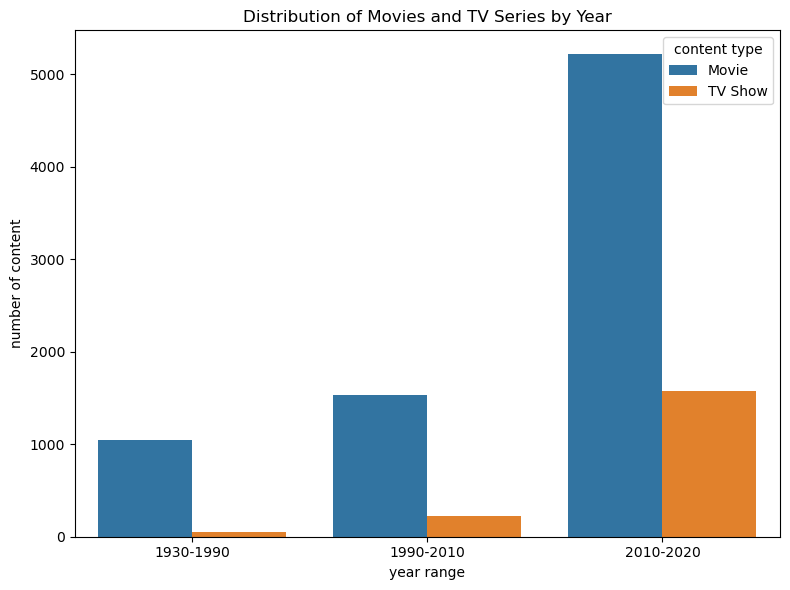

In [17]:
grouped = df.groupby(['year_group', 'type'])['type'].size().reset_index(name = 'count')

plt.figure(figsize = (8,6))
sns.barplot(x = 'year_group', y = 'count', hue = 'type', data = grouped)

plt.title('Distribution of Movies and TV Series by Year')
plt.xlabel('year range')
plt.ylabel('number of content')
plt.legend(title = 'content type')
plt.tight_layout()
plt.show


- The number of TV shows was low in the years 1930–1990 and 1990–2010. 
Most of the content that entered the Amazon Prime archive during those periods was film, meaning that **TV show production during those periods may have been low or not included in the Amazon archive.**
- However, for the period between 1930 and 1990 in particular, **film culture may have come to the fore because digitalization was not widespread and television shows had less global reach.**
- The number of TV shows is increasing between 2010 and 2020. This shows that **TV show production has increased significantly, and TV show culture has become more digital with the spread of broadcast platforms (Netflix, Amazon Prime, etc.)**

### Analysis of director column


In [20]:
df['director'] = df['director'].fillna('Unknown')
df['director'] = df['director'].str.split()
df['director'].isnull().sum()

0

In [21]:
top_directors = df['director'].value_counts().head(12)

top_directors



# indexes are list 


director
[unknown]                   2083
[Mark, Knight]               113
[Cannis, Holder]              61
[Moonbug, Entertainment]      37
[Jay, Chapman]                34
[Arthur, van, Merwijk]        30
[Manny, Rodriguez]            22
[John, English]               20
[1]                           16
[Brian, Volk-Weiss]           15
[Baeble, Music]               14
[Joseph, Kane]                13
Name: count, dtype: int64

In [22]:
# checking the data type of 'director' column 
print(df['director'].apply(type).value_counts())

# list -> string on df['director']

df['director'] = df['director'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x) 

print('\n after transforming \n',df['director'].apply(type).value_counts())

# clear unknown and 1 values 

unwanted = ['unknown', '1']
df_filtered = df[~df['director'].isin(unwanted)]

# top_directors re-assign 

top_directors = df_filtered['director'].value_counts().head(10)
print(top_directors)

director
<class 'list'>    9668
Name: count, dtype: int64

 after transforming 
 director
<class 'str'>    9668
Name: count, dtype: int64
director
Mark Knight              113
Cannis Holder             61
Moonbug Entertainment     37
Jay Chapman               34
Arthur van Merwijk        30
Manny Rodriguez           22
John English              20
Brian Volk-Weiss          15
Baeble Music              14
Joseph Kane               13
Name: count, dtype: int64


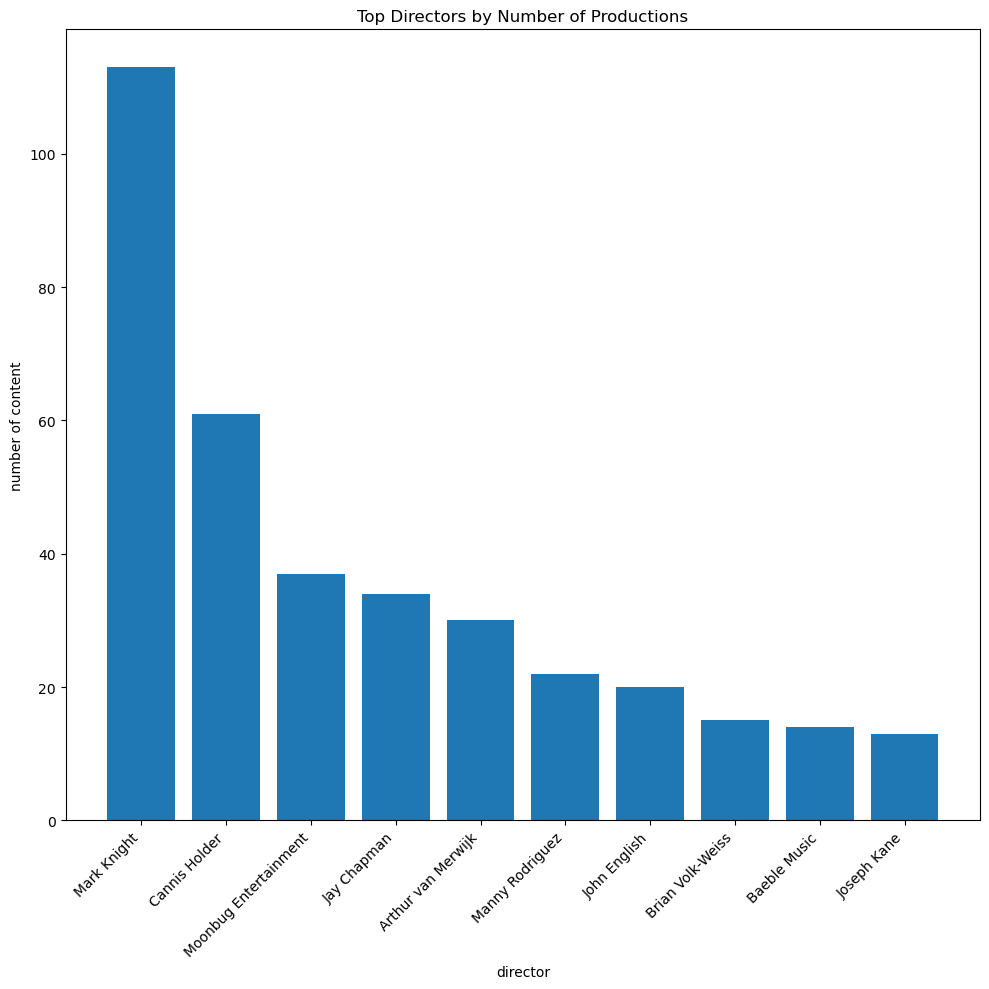

In [23]:
# visualization 
plt.figure(figsize = (10,10)) 
plt.bar(top_directors.index, top_directors.values)
plt.xlabel('director')
plt.ylabel('number of content')
plt.title('Top Directors by Number of Productions') 
plt.xticks(rotation = 45, ha = 'right') 
plt.tight_layout()
plt.show()
